In [1]:
!pip install mxnet=="1.4.1"

    100% |████████████████████████████████| 28.4MB 1.9MB/s eta 0:00:011    55% |█████████████████▉              | 15.8MB 102.3MB/s eta 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!pip install gluonts

    100% |████████████████████████████████| 327kB 37.0MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 53.2MB/s ta 0:00:01
    100% |████████████████████████████████| 10.4MB 5.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/41/17/c62faccbfbd163c7f57f3844689e3a78bae1f403648a6afb1d0866d87fbb/python_dateutil-2.8.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 7.1MB 7.4MB/s eta 0:00:011
    100% |████████████████████████████████| 194kB 61.5MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 41.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for holidays ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/40/a9/2b/94ac5464363d37564a87dc93a9d21a5850aac14a4608197003
  Running setup.py bdist_wheel for ujson ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/28/77/e4/0311145b9c2e2f01470e744855131f9e34d6919687550f87d1
Successfully built holidays ujson
  Found existing installation: python-dateuti

In [3]:
# !pip install gluonts=="0.4.1"

In [4]:
import gluonts
gluonts.__version__

'0.4.2'

In [5]:
import mxnet
mxnet.__version__

'1.4.1'

In [6]:
# standard imports
import numpy as np
import pandas as pd

# Vis
%matplotlib inline
import matplotlib.pyplot as plt
from pprint import pprint

# mxnet
import mxnet as mx

# gluonts
from gluonts.dataset.util import to_pandas

# imports from utility function
import utils_gluonts10 as utils
from utils_gluonts10 import get_dataset, dataset_recipes
from utils_gluonts10_deepar import deepar
# from utils_gluonts11_deepstate import deep_state


INFO:root:Using CPU


In [7]:
print(f"Available datasets: {list(dataset_recipes.keys())}")

Available datasets: ['m4_daily', 'm4_hourly', 'm4_monthly', 'm4_monthly_atm', 'm4_monthly_dates', 'm4_monthly_demographic', 'm4_monthly_finance', 'm4_monthly_industry', 'm4_monthly_macro', 'm4_monthly_micro', 'm4_monthly_other', 'm4_quarterly', 'm4_quarterly_atm', 'm4_quarterly_dates', 'm4_quarterly_demographic', 'm4_quarterly_finance', 'm4_quarterly_industry', 'm4_quarterly_macro', 'm4_quarterly_micro', 'm4_quarterly_other', 'm4_weekly', 'my_weekly_tm', 'm4_yearly', 'm4_yearly_industry', 'm4_yearly_macro', 'm4_yearly_micro']


#### Note

In SageMaker data are saved into the following folders (example shows m4_weekly):

```
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/train/data.json
saving time-series into /home/ec2-user/.mxnet/gluon-ts/datasets/m4_weekly/test/data.json
```

In [33]:
dataname = "m4_monthly_micro"
dataset = get_dataset(dataname, regenerate=False)

INFO:root:using dataset already processed in path /home/ec2-user/.mxnet/gluon-ts/datasets/m4_monthly_micro.


In [34]:
# get the first time series in the training set
train_entry = next(iter(dataset.train))
test_entry = next(iter(dataset.test))

# check keys
print(train_entry.keys())
print(test_entry.keys())

dict_keys(['start', 'target', 'feat_static_cat', 'source'])
dict_keys(['start', 'target', 'feat_static_cat', 'source'])


In [35]:
train_entry

{'start': Timestamp('1750-01-31 00:00:00', freq='M'),
 'target': array([ 3396.89,  3257.99,  3158.49,  3176.81,  3157.27,  3108.64,
         3063.8 ,  3098.17,  3106.87,  3096.37,  3193.22,  3230.99,
         3329.66,  3278.32,  3228.59,  3196.76,  3178.63,  3210.04,
         3236.73,  3281.7 ,  3298.  ,  3292.78,  3283.29,  3283.5 ,
         3266.97,  3238.75,  3228.64,  3275.36,  3289.36,  3304.42,
         3386.32,  3449.33,  3480.2 ,  3488.49,  3489.8 ,  3514.08,
         3509.89,  3507.85,  3535.43,  3557.9 ,  3569.59,  3581.05,
         3568.18,  3565.69,  3606.74,  3631.37,  3675.48,  3681.79,
         3677.63,  3697.65,  3706.94,  3697.  ,  3702.05,  3703.11,
         3677.1 ,  3703.61,  3716.26,  3688.9 ,  3665.12,  3615.87,
         3594.32,  3593.57,  3573.24,  3569.07,  3599.18,  3554.01,
         3484.06,  3424.86,  3433.06,  3373.05,  3448.19,  3465.57,
         3465.6 ,  3485.96,  3497.15,  3530.69,  3557.28,  3557.31,
         3504.81,  3521.84,  3527.23,  3572.4 ,  362

## Plot Series

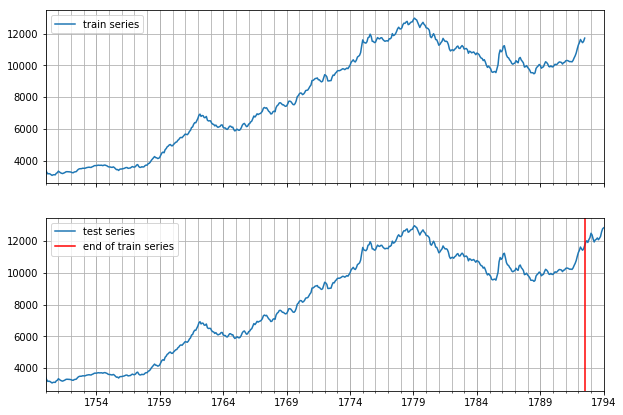

In [36]:
test_series = to_pandas(test_entry)
train_series = to_pandas(train_entry)

fig, ax = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

train_series.plot(ax=ax[0])
ax[0].grid(which="both")
ax[0].legend(["train series"], loc="upper left")

test_series.plot(ax=ax[1])
ax[1].axvline(train_series.index[-1], color='r') # end of train dataset
ax[1].grid(which="both")
ax[1].legend(["test series", "end of train series"], loc="upper left")

plt.show()

In [39]:
print("start:", dict(train_entry)["start"])
print("target:", dict(train_entry)["target"][:7])
print("feat_static_cat:", dict(train_entry)["feat_static_cat"])
print("length:", len(dataset.train))

start: 1750-01-31 00:00:00
target: [3396.89 3257.99 3158.49 3176.81 3157.27 3108.64 3063.8 ]
feat_static_cat: [1]
length: 10975


In [38]:
from gluonts.trainer import Trainer
from gluonts.evaluation.backtest import make_evaluation_predictions
from gluonts.evaluation import Evaluator

from gluonts.model.deepstate import DeepStateEstimator

# Study 1:`epochs=100, num_batches=50`

In [ ]:
#########################
### deepstate wrapper ###

data = "m4_monthly_micro"
seed = 42
epochs = 100
num_batches = 50
batch_size = 32


mx.random.seed(seed)
np.random.seed(seed)

dataset = get_dataset(data)

trainer = Trainer(
    ctx=mx.cpu(0),
#     ctx=mx.gpu(0),
    epochs=epochs,
    num_batches_per_epoch=num_batches,
    learning_rate=1e-3,
    batch_size=batch_size,
    )

cardinality = int(dataset.metadata.feat_static_cat[0].cardinality)
estimator = DeepStateEstimator(
    trainer=trainer,
    cardinality=[cardinality],
    prediction_length=dataset.metadata.prediction_length,
    freq=dataset.metadata.freq,
    use_feat_static_cat=True,
    )

predictor=estimator.train(dataset.train)

forecast_it, ts_it = make_evaluation_predictions(
        dataset.test, predictor=predictor, num_samples=100
    )

agg_metrics, item_metrics = Evaluator()(
    ts_it, forecast_it, num_series=len(dataset.test)
)

metrics = ["MASE", "sMAPE", "MSIS", "wQuantileLoss[0.5]", "wQuantileLoss[0.9]"]
output = {key: round(value, 8) for key, value in agg_metrics.items() if key in metrics}

output["seed"] = seed
output["epochs"] = epochs
output["num_batches"] = num_batches
# output["batch_size"] = batch_size

pd.DataFrame([output])

In [43]:
!jupyter nbconvert --output-dir="../html_outputs" --to html gluonts11-own-m4_subsets_sagemaker.ipynb

[NbConvertApp] Converting notebook gluonts11-own-m4_subsets_sagemaker.ipynb to html
[NbConvertApp] Writing 493797 bytes to ../html_outputs/gluonts11-own-m4_subsets_sagemaker.html


# Study 2: Increase `num_batches=100` 

In [47]:
!jupyter nbconvert --output-dir="../html_outputs" --to html gluonts11-own-m4_subsets_sagemaker.ipynb

[NbConvertApp] Converting notebook gluonts11-own-m4_subsets_sagemaker.ipynb to html
[NbConvertApp] Writing 570462 bytes to ../html_outputs/gluonts11-own-m4_subsets_sagemaker.html


# Study 3: `passes=100`

In [ ]:
!jupyter nbconvert --output-dir="../html_outputs" --to html gluonts11-own-m4_subsets_sagemaker.ipynb